# Problema 3: K-means
###  Obtener los centroides de cada clúster y el listado de los estados en cada uno de los clústeres

Uno de los problemas típicos que se puede resolver con técnicas de aprendizaje automático es la identificación de los grupos en los que se pueden agrupar los registros. El análisis de clúster hace referencia a las familias de técnicas que permiten agrupar las observaciones de conjuntos de datos en clústeres, de tal manera que los miembros asignados a un mismo clúster muestren una mayor similitud entre sí. Una de las técnicas más utilizadas es k-means.

El método de k-means requiere poder medir la similitud existente entre todos los registros del conjunto de datos. Una forma de hacer esto es asumir que los datos son puntos un espacio n-dimensional en el que se define una distancia con la que se mide la separación entre dos registros, de esta forma, la similitud de dos registros se relaciona con la inversa de su distancia. La distancia más conocida y utilizada es la distancia euclídea, ya que es la que se utiliza en el día a día para medir la separación de dos puntos. 

Los pasos de este algoritmo son:
1. Obtener tantos centroides como clusters se van a crear.
2. Calcular el valor de distancia de cada unos de los puntos del conjunto de datos a todos lo centrioides.
3. Una vez asignados todos los puntos a un cluster, se calcula la posición media de sus componentes y este pasa a ser el nuevo centroide.
4. Se calcula si la posición de los nuevos centroides ha cambiado más de cierto valor y en caso afirmativo se realiza de nuevo el proceso hasta que la variacón sea mínima.

Para realizar el ejercicio contamos con un data set con el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.
Se desea obtener los centroides de cada clúster y el listado de los estados en cada uno de los clústeres, encontrando el número óptimo de clusters. 

In [3]:
import pandas as pd

crime = pd.read_csv('crime_data.csv', sep = ',')
crime.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Se elimina la variable State ya que no se va a utilizar para la segmentación. Creando un nuevo data set.

In [4]:
col_names = list(crime.columns)
col_names.remove('State')

crime_data = crime[col_names]

### Visualización de los datos

#### 3D Plot
Para la identificación de los grupos en los que se pueden agrupar los registros, es muy útil utilizar gráficos para observar los posibles clusters e incluso lugo de aplicar el método se pueden utilizar para comprobar que se implementó de forma correcta. En este caso se cuenta con cuatro variables por lo tanto se decide realizar un gráfico en 4D utilizando las primeras tres variables en los ejes x, y y z y la cuarta en color.

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice f

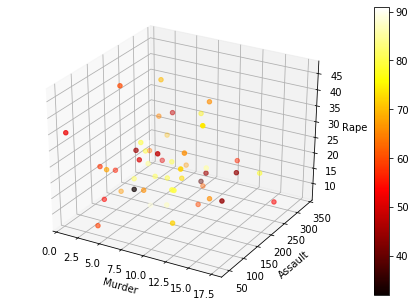

In [26]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = crime_data['Murder']
sequence_containing_y_vals = crime_data['Assault']
sequence_containing_z_vals = crime_data['Rape']
sequence_containing_c_vals = crime_data['UrbanPop']

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)
random.shuffle(sequence_containing_c_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, 
           sequence_containing_z_vals, c=sequence_containing_c_vals,cmap=plt.hot())
fig.colorbar(img)

ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
pyplot.show()

#### Heatmap plot 
Al graficar los clusters de k-mean en un heatmap podemos ilustrar cómo se podría utilizar esta agrupación para categorizar a los diferentes estados en los diferentes grupos de acuerdo al valor que toman en las diferentes variables.


In [20]:
col_names = list(crime.columns)
col_names.remove('State')
crime_cluster = crime[col_names]



# garantiza que todos los valores sean positivos (esto es necesario para el caso de uso de nuestro cliente 360) 
crime_cluster= crime_cluster.abs() 
# renombrar X columnas 
crime_cluster=rename_columns(crime_cluster) 
# y agregar Y 
crime_cluster['y']=clust

# dividir df en grupos de clústeres 
grouped=crime_cluster.groupby(['y'], sort = True)

# calcular sumas para cada columna en cada grupo 
sums=grouped.sum() 
sums

data=[go.Heatmap(  z = sums.values.tolist(),  
                   y = [ 'Cluster A' ,  'Cluster B' ,  'Cluster C'], 
                   x = [ 'Murder',
                        'Assault',
                        'UrbanPop',
                        'Rape'
                     ], 
                   colorscale='plasma')]
plotly.offline.iplot(data, filename='pandas-heatmap')

En este gráfico podemos observar que por ejemplo en el cluster B se encuentran los estados con mayores valores de Assault y a su vez de UrbanPop, estos estados también parecen tener los valores más altos de Murder y Rape.

### Selección del número de clusters

Teniendo listo el data set se procede a seleccionar el número de clusters con los métodos distorsión y silueta. 
Cuando los problemas se encuentran en espacios bidimensionales o tridimensionales se puede realizar visualmente representando los datos, pero en problemas en más dimensiones es necesario utilizar otras técnicas.

Con el método **dispersión** se calcula la distorsión promedio de los clústeres, que es la distancia promedio del centroide a todos los puntos del clúster y se obtiene con el algoritmo de k-means en función del número de clústeres. En cada una de las iteraciones se calcula el valor de la inercia del objeto y finalmente se presentan los resultados en una gráfica. 

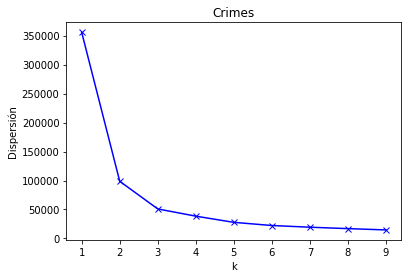

In [30]:
from matplotlib import pyplot as plt
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(crime_data, 'Crimes')

En esta gráfica se puede observar que la distorción se reduce bastane a partir del cluser 3 y la variación es casi nula a partir del cluster 4.

Procedemos ahora a aplicar el método **Silhouette** que se define como la diferencia entre la distancia media a los elementos del clúster más cercano (b) y a distancia intra-clúster media de los elementos de un clúster (a) dividido por el máximo de los dos. Al dividir por el máximo los dos valores, la Silhouette solamente puede tomar valores entre -1 y 1.
En el momento que se alcance el número de clústeres óptimos para un conjunto de datos, la Silhouette, en esta situación, se maximiza. 

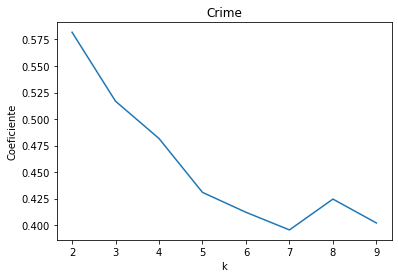

In [8]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plt.plot(range(2, max_k), sillhouette_avgs)
    plt.xlabel('k')
    plt.ylabel(u'Coeficiente')
    plt.title(figure_name)
   
    
plot_sillhouette(crime_data, 'Crime')

En esta ocasión se puede apreciar que el número óptimo de clústeres es 2 siendo el valor en dónde se hace máximo el coeficiente pero luego se observa otro máximo en el cluster 4. En este caso no es tan claro cuál es el númeor optimo de clusters pero combinando las dos gráficas anteriores se decide elegir 4 y se procede al ajuste con KMeans. Una vez ajustados el modelo se puede imprimir las propiedades de los diferentes clústeres.

### Ajuste con K-means

In [31]:
kmeans = KMeans(n_clusters = 4, n_init = 10).fit(crime_data)
kmeans.cluster_centers_

array([[  8.06428571, 173.28571429,  69.28571429,  19.40714286],
       [  6.99375   , 272.5625    ,  64.5       ,  20.16875   ],
       [  9.05      ,  62.7       ,  63.7       ,  25.79      ],
       [  7.41      , 112.4       ,  63.8       ,  20.93      ]])

A continuación se puede observar a que cluster pertenece cada estado.

In [69]:
clust = kmeans.predict(crime_data)
print(clust)
for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (crime["State"][clust == i])

[1 1 0 0 2 1 1 1 2 2 1 0 2 3 0 0 1 2 3 0 2 0 0 0 3 1 3 1 1 3 1 0 3 1 0 3 2
 0 1 2 0 1 3 0 3 3 1 2 2 1]
Cluster 0
2          Arizona
3         Arkansas
11           Idaho
14            Iowa
15          Kansas
19        Maryland
21        Michigan
22       Minnesota
23     Mississippi
31        New York
34            Ohio
37    Pennsylvania
40    South Dakota
43            Utah
Name: State, dtype: object
Cluster 1
0           Alabama
1            Alaska
5          Colorado
6       Connecticut
7          Delaware
10           Hawaii
16         Kentucky
25          Montana
27           Nevada
28    New Hampshire
30       New Mexico
33     North Dakota
38     Rhode Island
41        Tennessee
46       Washington
49          Wyoming
Name: State, dtype: object
Cluster 2
4         California
8            Florida
9            Georgia
12          Illinois
17         Louisiana
20     Massachusetts
36            Oregon
39    South Carolina
47     West Virginia
48         Wisconsin
Name: State, dtyp

In [70]:
col_names = list(crime.columns)
col_names.remove('State')
crime_cluster = crime[col_names]


crime_cluster['clust']=clust
crime_cluster.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


Una buena forma de visualizar los resultados es a través de los gráficos, como se cuenta con 4 variables para la segmentación se decide realizar la gráfica utilizando los datos de: Murder, Assault y Rape asumiendo que se está excluyendo UrbanPop.

In [65]:
# Visualize cluster shapes in 3d.

cluster1=crime_cluster.loc[crime_cluster['clust'] == 0]
cluster2=crime_cluster.loc[crime_cluster['clust'] == 1]
cluster3=crime_cluster.loc[crime_cluster['clust'] == 2]
cluster4=crime_cluster.loc[crime_cluster['clust'] == 3]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    marker = dict( size=2, color='violet')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    color='violet', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, cluster1, cluster2, cluster3, cluster4], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')



C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\letos\Anaconda3\lib\